<a href="https://colab.research.google.com/github/sharminislamshroddha/machine_learning/blob/main/dimentsion_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem:**
Load the MNIST dataset and split it into a training set and a test set 
(take the first 60,000 instances for training, and the remaining 10,000 for testing). 
Train a Random Forest classifier on the dataset and time how long it takes, 
then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality,
with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset 
and see how long it takes. Was training much faster? 
Try again with an SGDClassifier. How much does PCA help now?

##**Import Libraries**

In [15]:
import pandas as pd
import numpy as np
import time
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
import time

##**Create Classification Model**

In [16]:
def create_classification_model(**kwargs):

  if kwargs['model'] == 'RandomForestClassifier':
    
    start_time = time.time()

    model = RandomForestClassifier(n_estimators=100, random_state=42)

    model.fit(kwargs['X_train'], kwargs['y_train'])

    end_time = time.time()

    y_pred = model.predict(kwargs['X_test'])

    accuracy = accuracy_score(kwargs['y_test'], y_pred)

  if kwargs['model'] == 'SGDClassifier':
    
    start_time = time.time()

    model = SGDClassifier(random_state=42)

    model.fit(kwargs['X_train'], kwargs['y_train'])

    end_time = time.time()

    y_pred = model.predict(kwargs['X_test'])

    accuracy = accuracy_score(kwargs['y_test'], y_pred)

  return model, accuracy, end_time - start_time

##**Create Dimension Reducing Model**

In [17]:
def reduce_dimension(**kwargs):

  if kwargs['model'] == 'PCA':

    pca = PCA(n_components = kwargs['n_components']) # n_components = 0.95 means 95% data

    X_transformed = pca.fit_transform(kwargs['X'])

    X_transformed = pca.transform(kwargs['X'])

  if kwargs['model'] == 'TSNE':
    
    tsne = TSNE(n_components = kwargs['n_components'], random_state=42)

    X_transformed = tsne.fit_transform(kwargs['X'])

  if kwargs['model'] == 'LDA':

    lda = LinearDiscriminantAnalysis(n_components = kwargs['n_components'])
    
    lda_model = lda.fit(kwargs['X'], kwargs['y'])

    X_transformed = lda_model.transform(kwargs['X'])
    
  if kwargs['model'] == 'GaussianRandomProjection':

    grp = GaussianRandomProjection(n_components = kwargs['n_components'], random_state=42)

    X_transformed = grp.fit_transform(kwargs['X'])

    X_transformed = grp.transform(kwargs['X'])

  if kwargs['model'] == 'SparseRandomProjection':

    srp = SparseRandomProjection(n_components = kwargs['n_components'])
    
    X_transformed = srp.fit_transform(kwargs['X'])

    X_transformed = srp.transform(kwargs['X'])

  return X_transformed

##**Plot the data points**

In [31]:
def plot_data_points(**kwargs):
  
  plt.scatter(kwargs['X_transformed'][:, 0], kwargs['X_transformed'][:, 1], c=kwargs['y'])
  
  plt.colorbar()
  
  plt.title(kwargs['model_name'] + ' Visualization')
  
  plt.show()

##**Load "MNIST" dataset from scikit-learn**

In [19]:
mnist = fetch_openml('mnist_784', as_frame=False)

X = mnist.data

y = mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


##**Split the Dataset**

In [20]:
n_datapoints = 60000

# X_train, y_train = X[:n_datapoints], y[:n_datapoints]

# X_test, y_test = X[n_datapoints:], y[n_datapoints:]

X_train, y_train = X[:1000], y[:1000]
X_test, y_test = X[1000:], y[1000:]

##**RandomForestClassifier without PCA**

In [21]:
model, accuracy, r_time = create_classification_model(model='RandomForestClassifier', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

print('Accuracy: {0}'.format(accuracy))

print('Time: {0}'.format(r_time))

Accuracy: 0.8797971014492754
Time: 0.4433784484863281


##**RandomForestCLassifier with PCA**

In [22]:
X_transformed = reduce_dimension(model='PCA', n_components=0.95, X=X, y=y)

X_train_transformed, y_train = X_transformed[:1000], y[:1000]

X_test_transformed, y_test = X_transformed[1000:], y[1000:]

model, accuracy, r_time = create_classification_model(model='RandomForestClassifier', X_train=X_train_transformed, y_train=y_train, X_test=X_test_transformed, y_test=y_test)

print('Accuracy: {0}'.format(accuracy))

print('Time: {0}'.format(r_time))

Accuracy: 0.807231884057971
Time: 0.8973612785339355


##**SGDClassifier without PCA**

In [23]:
model, accuracy, r_time = create_classification_model(model='SGDClassifier', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

print('Accuracy: {0}'.format(accuracy))

print('Time: {0}'.format(r_time))

Accuracy: 0.8314927536231884
Time: 0.27274274826049805


##**SGDClassifier with PCA**

In [24]:
X_transformed = reduce_dimension(model='PCA', n_components=0.95,  X=X, y=y)

X_train_transformed, y_train = X_transformed[:1000], y[:1000]

X_test_transformed, y_test = X_transformed[1000:], y[1000:]

model, accuracy, r_time = create_classification_model(model='SGDClassifier', X_train=X_train_transformed, y_train=y_train, X_test=X_test_transformed, y_test=y_test)

print('Accuracy: {0}'.format(accuracy))

print('Time: {0}'.format(r_time))

Accuracy: 0.6443333333333333
Time: 0.42339372634887695


##**Dimension reduction and visualization using Different model**

####Taking some datapoints from the dataset

In [29]:
X_split = X[:1000]
y_split = y[:1000].astype(int)

####**t-SNE**

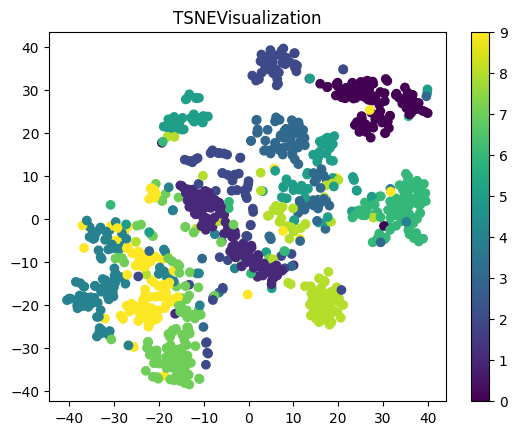

In [30]:
X_transformed = reduce_dimension(model='TSNE', n_components=2, X=X_split, y=y_split)

plot_data_points(model_name = 'TSNE', X_transformed=X_transformed, y=y_split)

####**PCA**

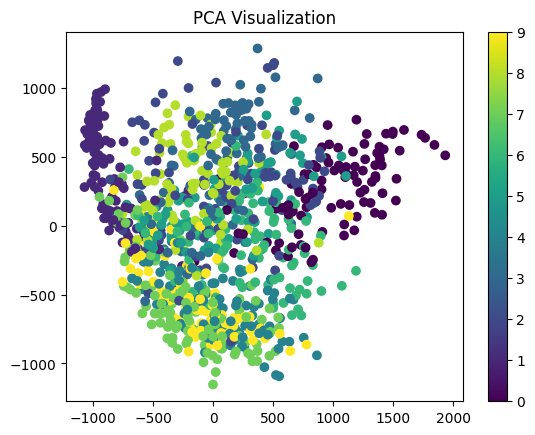

In [32]:
X_transformed = reduce_dimension(model='PCA', n_components=2, X=X_split, y=y_split)

plot_data_points(model_name = 'PCA', X_transformed=X_transformed, y=y_split)

####**LDA**

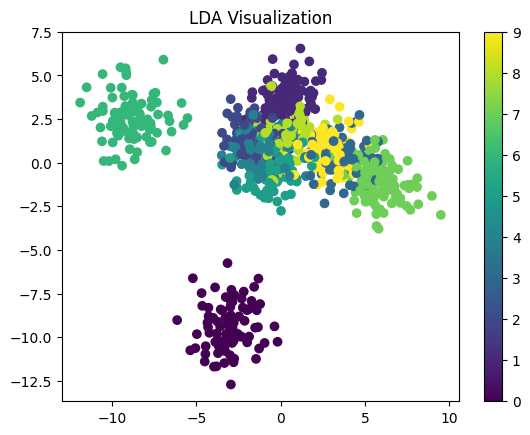

In [34]:
X_transformed = reduce_dimension(model='LDA', n_components=2, X=X_split, y=y_split)

plot_data_points(model_name = 'LDA', X_transformed=X_transformed, y=y_split)

####**Random projection**

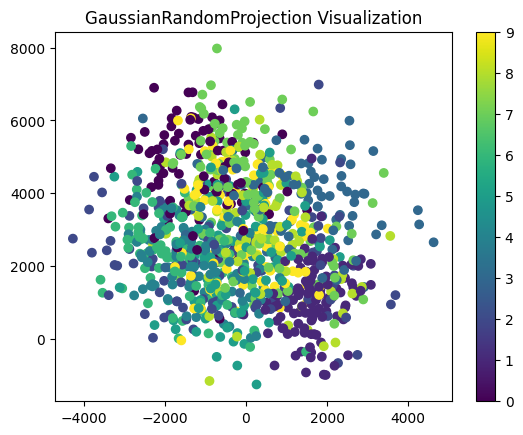

In [35]:
X_transformed = reduce_dimension(model='GaussianRandomProjection', n_components=2, X=X_split, y=y_split)

plot_data_points(model_name = 'GaussianRandomProjection', X_transformed=X_transformed, y=y_split)

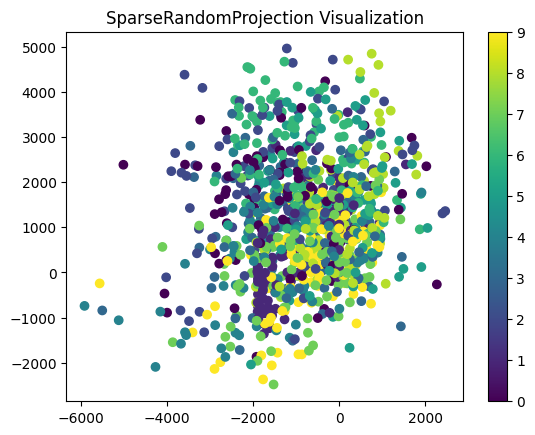

In [36]:
X_transformed = reduce_dimension(model='SparseRandomProjection', n_components=2, X=X_split, y=y_split)

plot_data_points(model_name = 'SparseRandomProjection', X_transformed=X_transformed, y=y_split)